In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wordnet/wordnet31/sentidx.vrb
/kaggle/input/wordnet/wordnet31/data.adj
/kaggle/input/wordnet/wordnet31/LICENSE
/kaggle/input/wordnet/wordnet31/index.adj
/kaggle/input/wordnet/wordnet31/README
/kaggle/input/wordnet/wordnet31/cousin.exc
/kaggle/input/wordnet/wordnet31/cntlist
/kaggle/input/wordnet/wordnet31/verb.exc
/kaggle/input/wordnet/wordnet31/verb.Framestext
/kaggle/input/wordnet/wordnet31/index.adv
/kaggle/input/wordnet/wordnet31/sents.vrb
/kaggle/input/wordnet/wordnet31/index.verb
/kaggle/input/wordnet/wordnet31/log.grind.3.1
/kaggle/input/wordnet/wordnet31/data.verb
/kaggle/input/wordnet/wordnet31/lexnames
/kaggle/input/wordnet/wordnet31/data.noun
/kaggle/input/wordnet/wordnet31/noun.exc
/kaggle/input/wordnet/wordnet31/index.noun
/kaggle/input/wordnet/wordnet31/adj.exc
/kaggle/input/wordnet/wordnet31/index.sense
/kaggle/input/wordnet/wordnet31/adv.exc
/kaggle/input/wordnet/wordnet31/cntlist.rev
/kaggle/input/wordnet/wordnet31/data.adv
/kaggle/input/wordnet/wordnet31

****

## Loading the dataset 

In [3]:
original_dataset=pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [4]:
data=original_dataset.copy()

In [5]:
data.sample(5)

,review,sentiment
38060,This is one of the best Bollywood movies i hav...,positive
30264,"Cinematography--Compared to 'The Wrestler,' a ...",positive
43053,"My favorite quote from Crow was, when the car ...",negative
11107,If you think it's beautiful to be obsessive ab...,negative
22174,No likeable characters (the lead is a combinat...,negative


In [6]:
print('shape of data :',data.shape)

shape of data : (50000, 2)


In [7]:
data.duplicated().sum()

418

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(49582, 2)

In [10]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

### check for imbalance and balanced dataset

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='sentiment'>

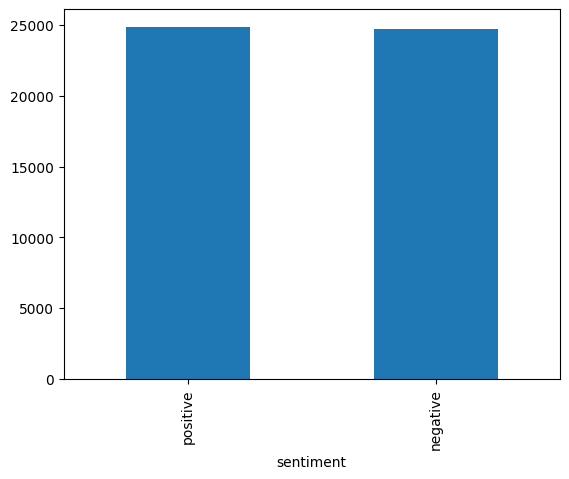

In [12]:
data['sentiment'].value_counts().plot(kind='bar')

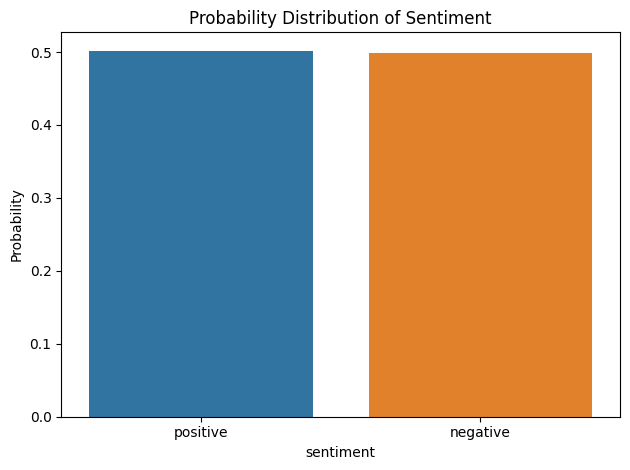

In [13]:
prob_distribution = data['sentiment'].value_counts(normalize=True)
# plotting  binomial probablity distribution using pmf
plt.xlabel('Sentiment')
plt.ylabel('Probability')
plt.title('Probability Distribution of Sentiment')
sns.barplot(x=prob_distribution.index, y=prob_distribution.values, estimator='median')
plt.tight_layout()
plt.show()

**It is balanced dataset**

## Basic preprocessing of text

### 1.cleaning of dataset

In [14]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

### Removing html tag

In [15]:
import re
def remove_htmltag(text):
    pattern=re.compile('<.*?>')
    return re.sub(pattern,'',text)

In [16]:
data['review']=data['review'].apply(remove_htmltag)

In [17]:
data['review'].sample(5)

9048     I saw this movie once in or close to its relea...
44425    I decided to watch this show and give it a go ...
33501    This movie was a mess. It had the absolute wor...
10967    STRANGER THAN FICTION angered me so much, I si...
7030     This sitcom was a big crowd puller in the year...
Name: review, dtype: object

### removing punctation

In [18]:
exclude=',.()-:""*+''!'
def remove(text:str)->str:
    for char in exclude:
        text=text.replace(char,'')
    return  text

In [19]:
data['review']=data['review'].apply(remove)

In [20]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare Forget pretty pict

### converting into lowercase

In [21]:
data['review']=data['review'].apply(lambda x:x.lower())

In [22]:
data['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare forget pretty pict

### check for url and emojis 

In [23]:
import emoji

In [24]:
def replace_urls(text):
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return re.sub(url_pattern, '', text)

In [25]:
data['review']=data['review'].apply(replace_urls)

In [26]:
data['review'][2]

"i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most i'd laughed at one of woody's comedies in years dare i say a decade? while i've never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends"

In [27]:
pip install emoji --upgrade

Note: you may need to restart the kernel to use updated packages.


In [28]:
def count_emojis(text):
    return sum(1 for char in text if emoji.is_emoji(char))

        
data['emoji_count']=data['review'].apply(count_emojis)    

In [29]:
data['emoji_count'].value_counts()

emoji_count
0    49577
1        5
Name: count, dtype: int64

In [30]:
data[data['emoji_count']==1]

,review,sentiment,emoji_count
13735,i checked this movie out based on a favorable ...,negative,1
21141,in april 1946 the university of chicago agreed...,positive,1
22728,that's the sound of stan and ollie spinning in...,negative,1
36507,klatret©ªsencatch that girl is really great mo...,positive,1
46515,i chuckled a few times during this movie i lau...,negative,1


**'®': ':registered:',
        '©': ':copyright:',
        'ª': ':feminine_ordinal_indicator:'**
#### we have to remove this from text

In [31]:
def remove_special_characters(text):
    characters_to_remove = ['®', '©', 'ª']
    for char in characters_to_remove:
        text = text.replace(char, '')
    return text

In [32]:
data['review']=data['review'].apply(remove_special_characters)

In [33]:
data['emoji_count']=data['review'].apply(count_emojis) 
data['emoji_count'].value_counts()

emoji_count
0    49582
Name: count, dtype: int64

In [34]:
def remove_abberviation(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"who'll", "who will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data) 
    return data

In [35]:
data['review']=data['review'].apply(lambda x:remove_abberviation(x))

In [36]:
print(data['review'][0])

one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget pretty pi

 ## 2.checking the distribution of stopwords

In [37]:
import nltk
import spacy
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords

In [38]:
nlp=spacy.load('en_core_web_sm')

In [39]:
# Analyse no.of stopwords through nltk and spacy

# function to count stopwords
stop_words=stopwords.words('english')
stopword=[]
def count_stopword(review_data):
    words=review_data.split()
    for word in words:
        if word in stop_words:
            stopword.append(word)
    
    
    
    
    

In [40]:
pos_data=data[data['sentiment']=='positive']
neg_data=data[data['sentiment']=='negative']

In [41]:
pos_data['review'].apply(lambda x:count_stopword(x))

0        None
1        None
2        None
4        None
5        None
         ... 
49983    None
49985    None
49989    None
49992    None
49995    None
Name: review, Length: 24884, dtype: object

In [42]:
from collections import Counter
freq=Counter(stopword)
print(freq)

Counter({'the': 330635, 'and': 173596, 'a': 161741, 'of': 150870, 'is': 140698, 'to': 130036, 'in': 97017, 'it': 90634, 'that': 68494, 'i': 68266, 'this': 66459, 'not': 50943, 'as': 50063, 'with': 45156, 'was': 44512, 'for': 43461, 'but': 39027, 'his': 33424, 'on': 32731, 'are': 32674, 'you': 32295, 'he': 31022, 'have': 29583, 'be': 24100, 'by': 23431, 'an': 22195, 'who': 22088, 'at': 22005, 'all': 21687, 'from': 20608, 'they': 19096, 'her': 18975, 'has': 18229, 'so': 17135, 'about': 16123, 'very': 15945, 'out': 15358, 'or': 14970, 'there': 14929, 'what': 14467, 'more': 14449, 'some': 14184, 'when': 14145, 'she': 14111, 'do': 13989, 'will': 13958, 'just': 13836, 'if': 13721, 'my': 12449, 'their': 12181, 'which': 11792, 'up': 11346, 'can': 10951, 'we': 10525, 'had': 9973, 'me': 9779, 'only': 9731, 'were': 9581, 'does': 9538, 'most': 9390, 'him': 9317, 'other': 9238, 'than': 9060, 'its': 8812, 'no': 8759, 'did': 8729, 'into': 8703, 'been': 8155, 'how': 8130, 'because': 7868, 'them': 7273

In [43]:
stopword=[]
neg_data['review'].apply(lambda x:count_stopword(x))

3        None
7        None
8        None
10       None
11       None
         ... 
49994    None
49996    None
49997    None
49998    None
49999    None
Name: review, Length: 24698, dtype: object

In [44]:
n_freq=Counter(stopword)

In [45]:
print(n_freq)

Counter({'the': 313726, 'a': 155099, 'and': 143444, 'of': 135060, 'to': 134187, 'is': 131558, 'it': 90349, 'in': 84649, 'this': 77322, 'i': 75813, 'that': 72272, 'not': 65887, 'was': 54251, 'for': 41922, 'with': 40686, 'but': 40662, 'as': 39298, 'have': 35994, 'are': 34022, 'you': 33793, 'on': 32879, 'be': 28020, 'he': 26196, 'they': 25182, 'at': 23796, 'his': 23442, 'all': 22344, 'so': 21005, 'just': 20564, 'by': 20167, 'an': 20086, 'or': 19648, 'do': 19633, 'there': 19551, 'from': 19111, 'who': 19044, 'if': 17885, 'about': 17334, 'out': 16935, 'some': 16197, 'what': 15728, 'no': 15142, 'has': 15088, 'her': 14807, 'only': 13068, 'when': 13023, 'more': 12882, 'up': 12558, 'were': 12254, 'she': 12184, 'did': 12111, 'had': 11814, 'will': 11812, 'my': 11397, 'very': 11338, 'which': 11014, 'can': 10680, 'me': 10626, 'does': 10580, 'their': 10306, 'than': 9974, 'we': 9968, 'been': 9917, 'because': 9523, 'how': 8951, 'any': 8945, 'into': 8925, 'am': 8807, 'then': 8776, 'other': 8347, 'too': 

In [46]:
print(len(freq))
print(len(n_freq))

144
144


In [47]:
common_stopwords = set(freq.keys()) & set(n_freq.keys())

In [48]:
len(common_stopwords)

143

* there are 143 common stopwords in both positive and negative reviews 

##### most frequent stopwords in corpus

In [49]:
!pip install wordcloud

In [50]:
from wordcloud import WordCloud
def genrate_cloud(frequenices):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequenices)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

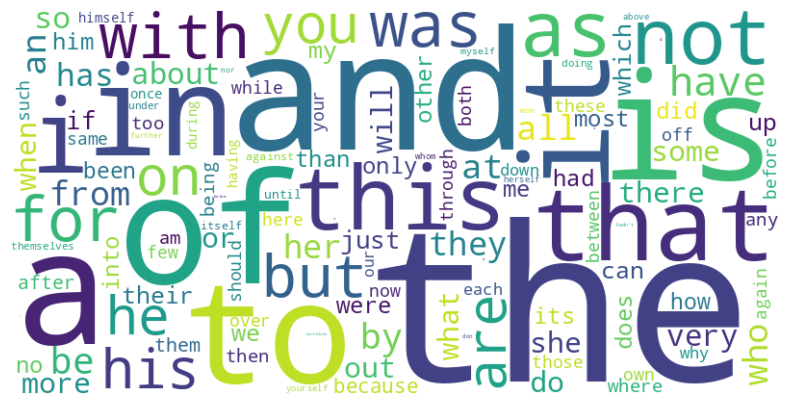

In [51]:
genrate_cloud(freq)

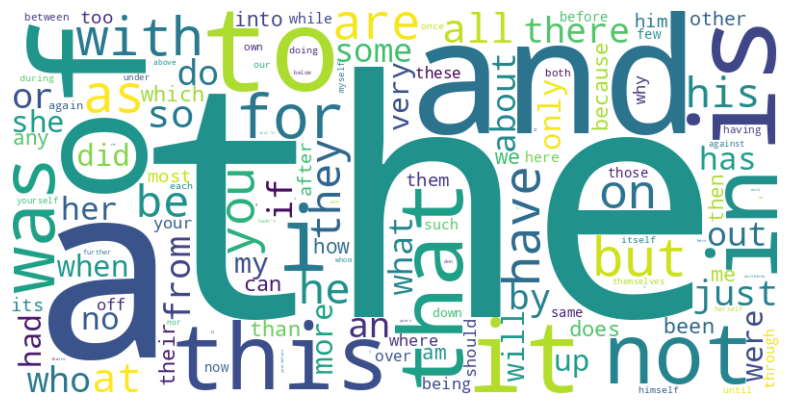

In [52]:
genrate_cloud(n_freq)

In [53]:
def bar_plot(freq):
    word=[]
    count=[]
    for words,counter in freq:
        word.append(words)
        count.append(counter)
    sns.barplot(x=count,y=word,palette='Set2')

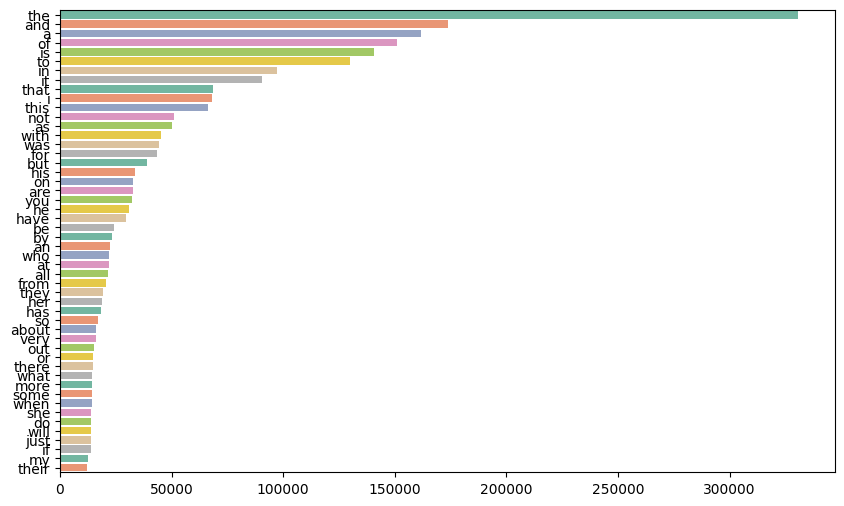

In [54]:
plt.figure(figsize=(10, 6))
bar_plot(freq.most_common()[:50])

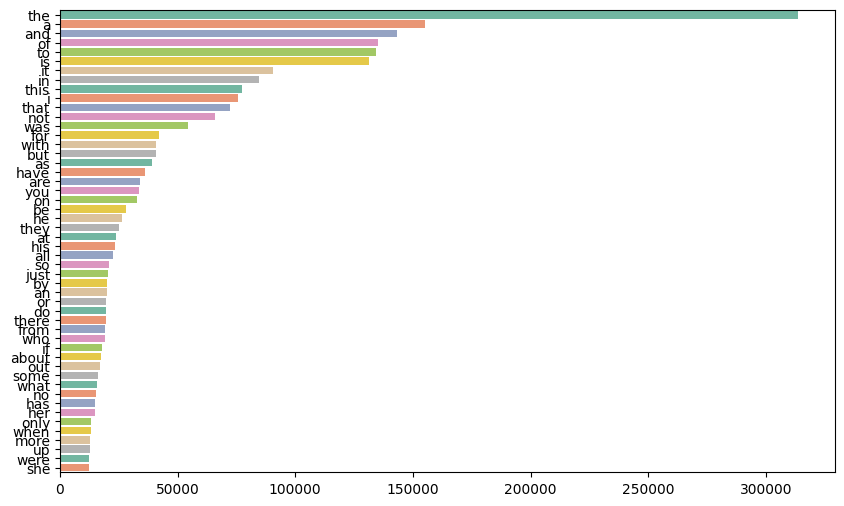

In [55]:
plt.figure(figsize=(10, 6))
bar_plot(n_freq.most_common()[:50])

#### balanced dataset in terms of stopword also

### 3. Making text comfortable with algorithms

##### It means we remove unneccesary grammatical words which possibly not contributing to caputer their semantic meaning if we talk about only content

#### 3.(a) Remove stopwords


In [56]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
def remove_stopwords(text):
    words=text.split()
    wstwords=[word for word in words if word not in stop_words]
    return ' '.join(wstwords)
    

In [57]:
data['review']=data['review'].apply(remove_stopwords)

In [58]:
data['review'].sample(5)

43768    one best movies french revolution ever produce...
46840    tv newscaster kimberly wells jane fonda radica...
43482    chop shop written directed ramin bahrani man p...
35077    valeria elegant pretty young lady lives world ...
44410    school's drama club putting show spring 2002 h...
Name: review, dtype: object

#### 3.(b) Lemmitization 

In [62]:
nltk.data.path.append('/kaggle/input/wordnet/wordnet31')

In [64]:
import nltk
from nltk.stem import WordNetLemmatizer

def lemmanitizer(text):
    lemmatizer=WordNetLemmatizer()
    output=''
    for word in text:
        output+=lemmatizer.lemmatize(word)
    return output

In [65]:
data['review']=data['review'].apply(lemmanitizer)

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/kaggle/input/wordnet/wordnet31'
**********************************************************************

In [ ]:
data['review'][0]